In [1]:
pip install eventregistry

  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'eventregistry' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'eventregistry'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for eventregistry: filename=eventregistry-9.1-py3-none-any.whl size=67624 sha256=3b83e6dad1dbb7f61dd718494c5888c224d15d149f98a1f4a2303ef94a7b86d5
  Stored in directory: /root/.cache/pip/wheels/ef/b4/df/d901df881884202dc1fcb1a2ce42852f26ecf6fd1200ebf2b8
Successfully built eventregistry
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from eventregistry import *
from datetime import date, timedelta

er = EventRegistry(apiKey="ced441ab-7fa4-4e20-b4af-8bd02fbb5431")

italian_source_uris = [
    'ansa.it', 'corriere.it', 'repubblica.it', 'lastampa.it', 'ilsole24ore.com',
    'adnkronos.com', 'ilfattoquotidiano.it', 'ilmessaggero.it', 'ilgiornale.it',
    'avvenire.it', 'internazionale.it', 'ilmattino.it', 'ilgazzettino.it',
    'unionesarda.it', 'ilsecoloxix.it', 'gds.it', 'quotidiano.net', 
    'liberoquotidiano.it', 'huffingtonpost.it', 'fanpage.it'
]

end_date = date.today()
start_date = end_date - timedelta(days=30)

all_articles = []
max_articles_to_fetch = 10000

print(f"Inizio raccolta per un massimo di {max_articles_to_fetch} articoli italiani da {start_date} a {end_date}.") #dati ottenuti nel mese tra il primo giugno e il primo luglio
print(f"Numero di fonti utilizzate: {len(italian_source_uris)}")

requested_info = RequestArticlesInfo(
    returnInfo=ReturnInfo(
        articleInfo=ArticleInfoFlags(
            body=True,
            title=True,
            url=True,
            source=SourceInfoFlags(title=True),
            dateTimePub=True
        )
    )
)

q = QueryArticlesIter( #classe utile per gestire richieste API
    sourceUri=QueryItems.OR(italian_source_uris), #dice ad API dove (quale fonte) cercare gli articoli
    dateStart=start_date,
    dateEnd=end_date,
    lang="ita",
    requestedResult=requested_info
)

# Esegui la query
print(f"Eseguo la query... La libreria scaricherà gli articoli in blocchi.")
try:
    for article in q.execQuery(er, sortBy="date", max_items=max_articles_to_fetch):
        all_articles.append({
            'source': article.get('source', {}).get('title', 'N/A'),
            'title': article.get('title'),
            'description': article.get('body', '')[:300] + '...' if article.get('body') else '',
            'content': article.get('body'),
            'published_at': article.get('dateTimePub'),
            'url': article.get('url')
        })

        if len(all_articles) > 0 and len(all_articles) % 250 == 0:
            print(f"  -> Raccolti {len(all_articles)} articoli...")

except Exception as e:
    print(f"\nERRORE durante il download degli articoli: {e}")
    print("Potrebbe essere stato raggiunto il limite del piano gratuito o un altro problema con la richiesta.")

# Crea un DataFrame e salvalo
df = pd.DataFrame(all_articles)
df.to_csv('articoli_italia_ultimi_30_giorni.csv', index=False)
print(f"\nRaccolta completata! Totale articoli salvati: {len(df)}")

Inizio raccolta per un massimo di 10000 articoli italiani da 2025-06-01 a 2025-07-01.
Numero di fonti utilizzate: 20
Eseguo la query... La libreria scaricherà gli articoli in blocchi.
  -> Raccolti 250 articoli...
  -> Raccolti 500 articoli...
  -> Raccolti 750 articoli...
  -> Raccolti 1000 articoli...
  -> Raccolti 1250 articoli...
  -> Raccolti 1500 articoli...
  -> Raccolti 1750 articoli...
  -> Raccolti 2000 articoli...
  -> Raccolti 2250 articoli...
  -> Raccolti 2500 articoli...
  -> Raccolti 2750 articoli...
  -> Raccolti 3000 articoli...
  -> Raccolti 3250 articoli...
  -> Raccolti 3500 articoli...
  -> Raccolti 3750 articoli...
  -> Raccolti 4000 articoli...
  -> Raccolti 4250 articoli...
  -> Raccolti 4500 articoli...
  -> Raccolti 4750 articoli...
  -> Raccolti 5000 articoli...
  -> Raccolti 5250 articoli...
  -> Raccolti 5500 articoli...
  -> Raccolti 5750 articoli...
  -> Raccolti 6000 articoli...
  -> Raccolti 6250 articoli...
  -> Raccolti 6500 articoli...
  -> Raccolti

=========== WARNING ===========
The processing of the request took a lot of time (20 sec). By repeatedly making slow requests your account will be temporarily disabled.


  -> Raccolti 75250 articoli...
  -> Raccolti 75500 articoli...
  -> Raccolti 75750 articoli...
  -> Raccolti 76000 articoli...
  -> Raccolti 76250 articoli...
  -> Raccolti 76500 articoli...
  -> Raccolti 76750 articoli...
  -> Raccolti 77000 articoli...
  -> Raccolti 77250 articoli...
  -> Raccolti 77500 articoli...
  -> Raccolti 77750 articoli...
  -> Raccolti 78000 articoli...
  -> Raccolti 78250 articoli...
  -> Raccolti 78500 articoli...
  -> Raccolti 78750 articoli...
  -> Raccolti 79000 articoli...
  -> Raccolti 79250 articoli...
  -> Raccolti 79500 articoli...
  -> Raccolti 79750 articoli...
  -> Raccolti 80000 articoli...
  -> Raccolti 80250 articoli...
  -> Raccolti 80500 articoli...
  -> Raccolti 80750 articoli...
  -> Raccolti 81000 articoli...
  -> Raccolti 81250 articoli...
  -> Raccolti 81500 articoli...
  -> Raccolti 81750 articoli...

Raccolta completata! Totale articoli salvati: 81892


In [23]:
df.head(20)

,source,title,description,content,published_at,url
0,ANSA.it,"Sfollati Ancona senza contributo, 'paghiamo mu...","I cittadini in Aula: ""ci considerino come gli ...","I cittadini in Aula: ""ci considerino come gli ...",2025-07-01T11:08:09Z,https://www.ansa.it/marche/notizie/2025/07/01/...
1,Internazionale,Bombardamento israeliano di un internet café a...,"Nonostante i ripetuti appelli per una tregua, ...","Nonostante i ripetuti appelli per una tregua, ...",2025-07-01T11:01:13Z,https://www.internazionale.it/ultime-notizie/2...
2,ANSA.it,Contro il caldo cento alberi nelle piazze del ...,L'allerta caldo non dà tregua e il Comune di B...,L'allerta caldo non dà tregua e il Comune di B...,2025-07-01T11:09:41Z,https://www.ansa.it/emiliaromagna/notizie/2025...
3,ANSA.it,"Regione, approvato programma per il Fondo Stra...",Il consiglio regionale della Liguria ha approv...,Il consiglio regionale della Liguria ha approv...,2025-07-01T11:02:44Z,https://www.ansa.it/liguria/notizie/2025/07/01...
4,ANSA.it,++ La premier Meloni domani da Papa Leone ++ -...,Papa Leone XIV riceverà domani in udienza la p...,Papa Leone XIV riceverà domani in udienza la p...,2025-07-01T11:00:14Z,https://www.ansa.it/sito/notizie/flash/2025/07...
5,Adnkronos,"Algeria, lo scrittore Sansal condannato a 5 an...",Lo scrittore franco algerino Boualem Sansal è ...,Lo scrittore franco algerino Boualem Sansal è ...,2025-07-01T11:11:01Z,https://www.adnkronos.com/internazionale/ester...
6,HuffPost Italia,"Bergamo, pubblicava reel e post di propaganda ...",Aveva postato sui social media numerosi reel e...,Aveva postato sui social media numerosi reel e...,2025-07-01T09:13:00Z,https://www.huffingtonpost.it/video/2025/07/01...
7,HuffPost Italia,"Bergamo, pubblicava reel e post di propaganda ...",Aveva postato sui social media numerosi reel e...,Aveva postato sui social media numerosi reel e...,2025-07-01T09:14:00Z,https://www.huffingtonpost.it/video/2025/07/01...
8,HuffPost Italia,"Incendi a Roma, in fiamme rivenditore di auto ...","Copiato negli appunti <iframe src=""https://www...","Copiato negli appunti <iframe src=""https://www...",2025-07-01T09:12:00Z,https://www.huffingtonpost.it/video/2025/07/01...
9,HuffPost Italia,"Dazi, Tajani: ""Il mio obiettivo è 0-0 con Cana...",Il ministro degli Esteri e vicepremier Antonio...,Il ministro degli Esteri e vicepremier Antonio...,2025-07-01T09:11:00Z,https://www.huffingtonpost.it/video/2025/07/01...


In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re

# Download dei componenti NLTK (se non già fatto)
try:
    stopwords.words('italian')
except LookupError:
    nltk.download('stopwords')
    nltk.download('punkt')

stop_words = set(stopwords.words('italian'))
tokenizer = RegexpTokenizer(r'\w+')

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    
    text = re.sub(r'http\S+|www\S+|@\w+', '', text)
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    
    filtered_tokens = [
        word for word in tokens 
        if word.isalpha() and word not in stop_words and len(word) > 2
    ]
    return " ".join(filtered_tokens)

print("Inizio preprocessing del testo...")

# --- MODIFICA CHIAVE QUI ---
# Usiamo la colonna 'content' che contiene il corpo completo dell'articolo.
# Inoltre, gestiamo i valori mancanti (NaN) con .fillna('') per evitare errori.
df['processed_text'] = df['content'].fillna('').apply(preprocess_text)

print("Preprocessing completato.")

print("\n--- Esempio di Preprocessing ---")
print("Testo Originale (dalla colonna 'content'):\n", df['content'].iloc[0])
print("\nTesto Processato:\n", df['processed_text'].iloc[0])

Inizio preprocessing del testo...
Preprocessing completato.

--- Esempio di Preprocessing ---
Testo Originale (dalla colonna 'content'):
 L'assemblea nazionale dell'Enpam, l'ente previdenziale dei medici ed odontoiatri, ha rieletto, con l'ampio consenso degli aventi diritto al voto ( 178 voti su 186 votanti), Alberto Oliveti alla sua presidenza. Oliveti riveste per la terza volta questa importante carica che manterrà per i prossimi quattro anni (2025/29). Il neo presidente ha indicato nel suo articolato programma le condizioni dell'attuale status della categoria e le prospettiva che si impone di realizzare nel prossimo futuro.

In un quadro internazionale incerto, viene sottolineato, stanno diventando marginali questioni che invece dovrebbero essere prioritarie, come le transizioni ecologiche ed energetiche, le proiezioni demografiche allarmanti, l'impatto dell'intelligenza artificiale generale, le dispute commerciali e le previsioni di rallentamento della crescita mondiale. Tutto ques

In [27]:
!pip install community

  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'community' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'community'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for community: filename=community-1.0.0b1-py3-none-any.whl size=2137 sha256=2fad38d1ab14de0bb1ddc0579a99e3e306b3e1af36eebd3c14302158f71b23a5
  Stored in directory: /root/.cache/pip/wheels/1d/8c/5e/74907ee438b2ce993d5a7a92b9c2c40accd75150578d119ace
Successfully built community
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [community]/5 [Flask]


In [1]:
# Cella 1 - Pulizia
!pip uninstall community -y
!pip uninstall python-louvain -y

Found existing installation: community 1.0.0b1
Uninstalling community-1.0.0b1:
  Successfully uninstalled community-1.0.0b1


In [5]:
# Cella 2 - Installazione corretta
!pip install python-louvain

Inizio costruzione della rete...
Matrice TF-IDF creata. Dimensioni: (81892, 5000)
Calcolati i 5 vicini più prossimi per ogni articolo.

--- Rete creata! ---
Nodi: 81892, Archi: 336285

Inizio analisi delle community...
Rilevate 272 community.

Prime 10 community per dimensione:
community
117    3256
40     2447
28     2185
97     1841
82     1716
49     1669
8      1608
10     1601
35     1446
56     1397
Name: count, dtype: int64

--- Analisi della Community #117 (Dimensione: 3256 articoli) ---
Distribuzione delle testate (in %):
source
ANSA.it              16.77
il Giornale.it        8.91
Quotidiano Libero     8.54
QuotidianoNet         8.20
Il Messaggero         7.92
Name: proportion, dtype: float64

Titoli di esempio:
 - Khamenei rivendica vittoria dell'Iran: duro schiaffo agli Usa
 - Avvenire esagera, Papa Leone XIV lo corregge | Libero Quotidiano.it
 - Perché non è più Trump il leader da studiare per capire cosa succederà nella guerra tra Israele e Iran
 - Iran, gli scienziati Us

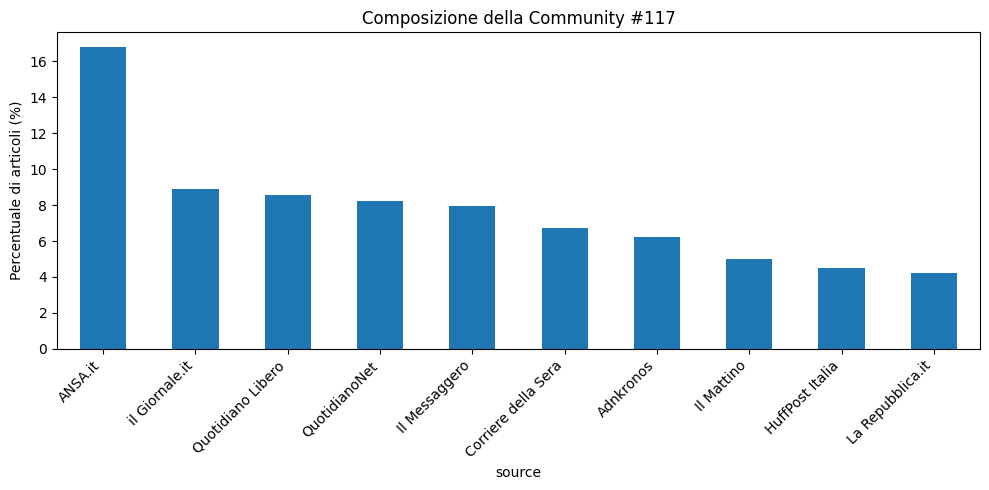


--- Analisi della Community #40 (Dimensione: 2447 articoli) ---
Distribuzione delle testate (in %):
source
ANSA.it              28.44
Fanpage               9.03
Il Mattino            8.26
L'Unione Sarda.it     7.07
Adnkronos             6.50
Name: proportion, dtype: float64

Titoli di esempio:
 - "Si fermino le guerre, soprattutto vogliamo che finisca questa strage di bambini e di innocenti a Gaza": l'appello di Vasco Rossi al live di Firenze - IL VIDEO - Il Fatto Quotidiano
 - I Kraftwerk tornano in Italia per due date a luglio - Musica - Ansa.it
 - Gio Evan presenta la quarta edizione di 'Evanland' ad Assisi - Musica - Ansa.it
 - Luca Ward nuova 'voce' per gli annunci all'Arena di Verona - Musica - Ansa.it
 - A un mese dall'edizione '25, Umbria Jazz annuncia le date 2026 - Notizie - Ansa.it


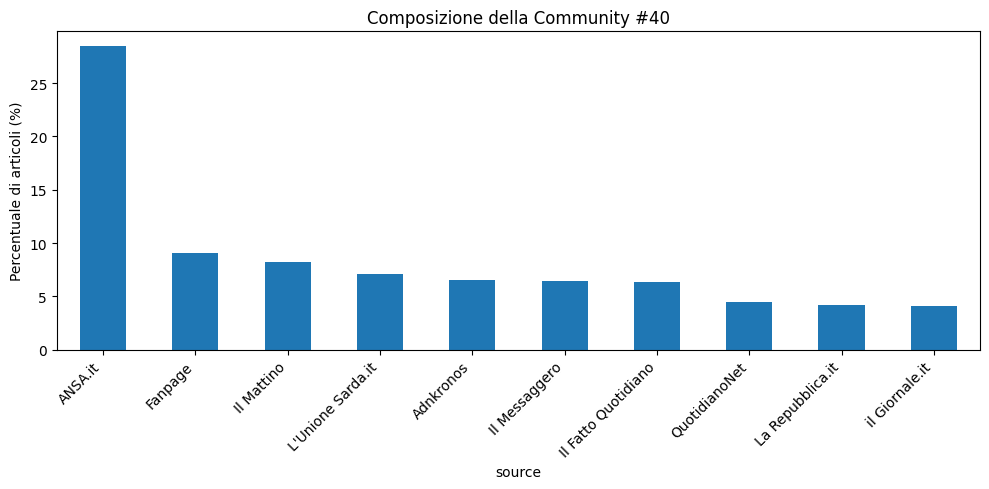


--- Analisi della Community #28 (Dimensione: 2185 articoli) ---
Distribuzione delle testate (in %):
source
ANSA.it          26.59
Il Mattino       16.02
Fanpage          14.83
Il Messaggero    10.39
Gazzettino        8.79
Name: proportion, dtype: float64

Titoli di esempio:
 - Avevano oltre un chilo di cocaina in auto, due arresti a Parma - Notizie - Ansa.it
 - Garage come deposito di droga, arrestato 41enne a Padova - Notizie - Ansa.it
 - Torre del Greco, accoltellarono un giovane nel 2024: arrestati 23enne e 32enne
 - Cosa è successo a Ezra Miller, tutte le accuse contro il cantante e i problemi di salute mentale
 - Danneggiano antica fontana con un petardo, denunciati - Notizie - Ansa.it


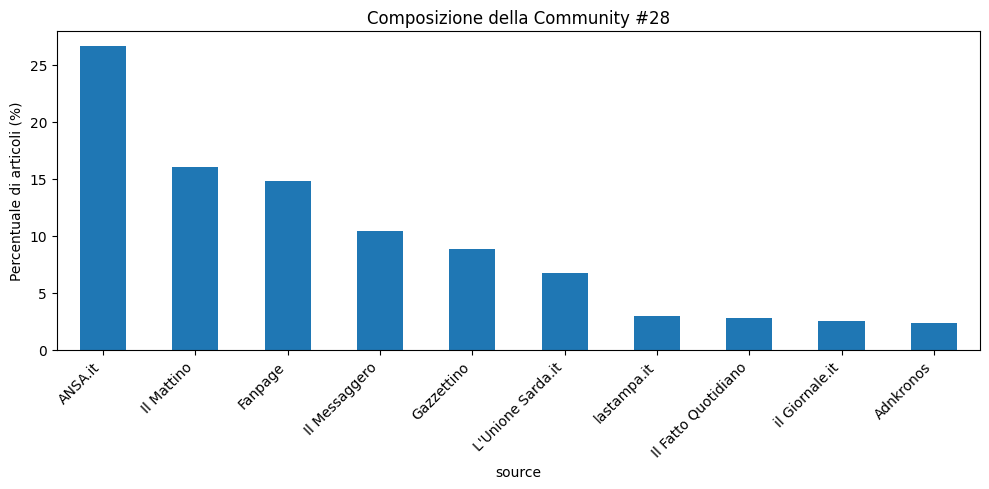


--- Analisi della Community #97 (Dimensione: 1841 articoli) ---
Distribuzione delle testate (in %):
source
ANSA.it                20.91
Fanpage                18.31
Il Messaggero          10.05
Corriere della Sera     7.77
La Repubblica.it        6.41
Name: proportion, dtype: float64

Titoli di esempio:
 - Perché il Lione è stato retrocesso a tavolino: cosa succede ora in Francia e in Europa
 - Inter, "sappiamo cosa dobbiamo fare": i tifosi chiedono la contestazione | Libero Quotidiano.it
 - Paolo Mieli sgancia la bomba: "Juve, è scoppiato un pandemonio" | Libero Quotidiano.it
 - Mondiale per Club, quando giocano Inter e Juventus: gli orari e dove vederle in chiaro (tv e streaming)
 - Mondiale per club, il tabellone degli ottavi: Juve-Real e Inter-Fluminense. Inzaghi sfida Guardiola


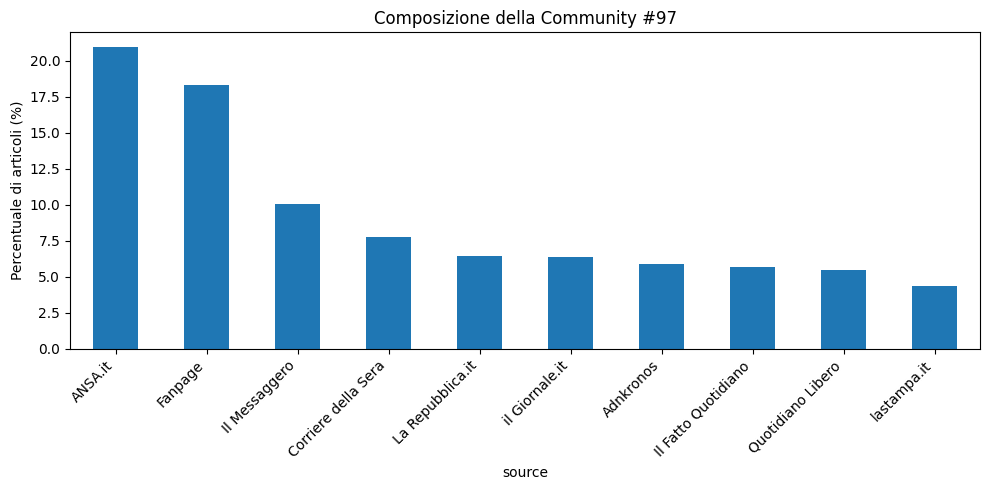


--- Analisi della Community #82 (Dimensione: 1716 articoli) ---
Distribuzione delle testate (in %):
source
ANSA.it                24.30
Il Fatto Quotidiano    10.02
Quotidiano Libero       8.28
L'Unione Sarda.it       6.76
QuotidianoNet           6.59
Name: proportion, dtype: float64

Titoli di esempio:
 - Ben Saul: "Israele adesso va isolata
 - Freedom Flotilla verso Gaza: Greta Thunberg tra gli attivisti a bordo della nave umanitaria
 - Almeno 49 i morti nei raid israeliani su Gaza - Notizie - Ansa.it
 - Anna Foa: "Salviamo l'altra Israele che vuole la pace"
 - Repubblica delle Idee 2025, la diretta: il premio Scalfari. I ricordi di Orfeo e Mauro, l'intervista a Baricco


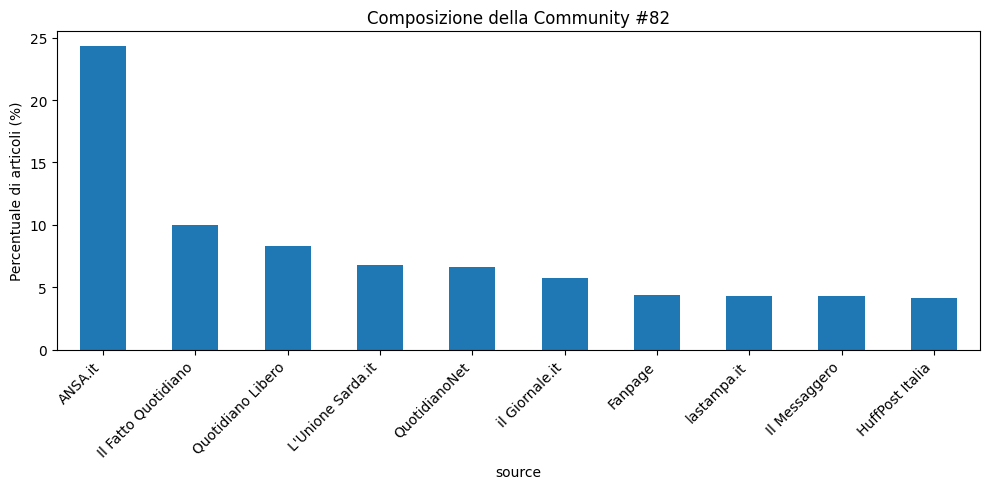

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt

# --- FASE 3: COSTRUZIONE RETE (Nessuna modifica necessaria qui, usa già 'processed_text') ---
print("Inizio costruzione della rete...")
vectorizer = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.7)
tfidf_matrix = vectorizer.fit_transform(df['processed_text'])
print(f"Matrice TF-IDF creata. Dimensioni: {tfidf_matrix.shape}")

k = 6
nbrs = NearestNeighbors(n_neighbors=k, metric='cosine').fit(tfidf_matrix)
distances, indices = nbrs.kneighbors(tfidf_matrix)
print(f"Calcolati i {k-1} vicini più prossimi per ogni articolo.")

G = nx.Graph()
df['article_id'] = df.index # Assicuriamoci che l'ID esista

# --- MODIFICA CHIAVE QUI ---
# Quando aggiungiamo i nodi, usiamo la tua colonna 'source' invece di 'source_name'
for i in range(len(df)):
    G.add_node(df.loc[i, 'article_id'], 
               source=df.loc[i, 'source'], # <<-- Usa 'source'
               title=df.loc[i, 'title'])

for i in range(indices.shape[0]):
    for j_idx in range(1, k):
        neighbor_index = indices[i][j_idx]
        similarity = 1 - distances[i][j_idx]
        if similarity > 0.1:
            G.add_edge(df.loc[i, 'article_id'], 
                       df.loc[neighbor_index, 'article_id'], 
                       weight=similarity)

print("\n--- Rete creata! ---")
print(f"Nodi: {G.number_of_nodes()}, Archi: {G.number_of_edges()}")


# --- FASE 4: ANALISI COMMUNITY (Con nomi di colonna corretti) ---
print("\nInizio analisi delle community...")
partition = community_louvain.best_partition(G, weight='weight')
nx.set_node_attributes(G, partition, 'community')
print(f"Rilevate {len(set(partition.values()))} community.")

# --- MODIFICA CHIAVE QUI ---
# Creiamo il DataFrame con i dati giusti dai nodi del grafo
node_data = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')

community_counts = node_data['community'].value_counts()
print("\nPrime 10 community per dimensione:")
print(community_counts.head(10))

N_TOP_COMMUNITIES = 5
for comm_id in community_counts.head(N_TOP_COMMUNITIES).index:
    print(f"\n--- Analisi della Community #{comm_id} (Dimensione: {community_counts[comm_id]} articoli) ---")
    community_nodes = node_data[node_data['community'] == comm_id]
    
    # --- MODIFICA CHIAVE QUI ---
    # Usa la colonna 'source' per la distribuzione
    source_distribution = community_nodes['source'].value_counts(normalize=True) * 100
    
    print("Distribuzione delle testate (in %):")
    print(source_distribution.head(5).round(2))
    
    print("\nTitoli di esempio:")
    sample_titles = community_nodes.sample(min(5, len(community_nodes)))['title']
    for title in sample_titles:
        print(f" - {title}")

    # Visualizzazione (nessuna modifica qui)
    plt.figure(figsize=(10, 5))
    source_distribution.head(10).plot(kind='bar')
    plt.title(f"Composizione della Community #{comm_id}")
    plt.ylabel("Percentuale di articoli (%)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()